# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


In [4]:
cities

['grytviken',
 'bikenibeu village',
 'adamstown',
 'whitehorse',
 'idaho falls',
 'pacific grove',
 'ushuaia',
 'port-aux-francais',
 'pierre',
 'puerto natales',
 'anadyr',
 'itapipoca',
 'sisimiut',
 'kodiak',
 'touros',
 'papatowai',
 'west island',
 'waitangi',
 "mil'kovo",
 'khandyga',
 'ilulissat',
 'punta arenas',
 'hamilton',
 'margaret river',
 'isafjordur',
 'sur',
 'talnakh',
 'rongelap',
 'saipan',
 'utrik',
 'uturoa',
 'bethel',
 'quellon',
 'tiksi',
 'yorkton',
 'suva',
 'cuito',
 'tortoli',
 'mamuju',
 'buka',
 'reggane',
 'bredasdorp',
 'berlin',
 'labytnangi',
 'yellowknife',
 'puerto san carlos',
 'puerto ayora',
 'invercargill',
 'kavieng',
 'kendari',
 'tobelo',
 'ribeira grande',
 'mahalapye',
 'port elizabeth',
 'arraial do cabo',
 'kourou',
 'yeed',
 'mana',
 'iqaluit',
 'krusevac',
 'castillos',
 'tsiombe',
 'ishigaki',
 'flin flon',
 'yangor',
 'tchintabaraden',
 'tafuna',
 'mukalla',
 'blackmans bay',
 'queenstown',
 'kitimat',
 'port mathurin',
 'udachny',
 '

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | bikenibeu village
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | whitehorse
Processing Record 5 of Set 1 | idaho falls
Processing Record 6 of Set 1 | pacific grove
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | pierre
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | anadyr
Processing Record 12 of Set 1 | itapipoca
Processing Record 13 of Set 1 | sisimiut
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | touros
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | mil'kovo
Processing Record 20 of Set 1 | khandyga
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | punta arenas
Processing

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,0.33,77,13,1.36,GS,1714091369
1,bikenibeu village,1.3673,173.1241,30.98,79,20,4.63,KI,1714091370
2,adamstown,-25.0660,-130.1015,23.44,88,19,8.23,PN,1714091371
3,whitehorse,60.7161,-135.0538,13.43,24,75,1.03,CA,1714091105
4,idaho falls,43.4666,-112.0341,14.45,60,75,2.57,US,1714091372


In [7]:
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,0.33,77,13,1.36,GS,2024-04-26
1,bikenibeu village,1.3673,173.1241,30.98,79,20,4.63,KI,2024-04-26
2,adamstown,-25.0660,-130.1015,23.44,88,19,8.23,PN,2024-04-26
3,whitehorse,60.7161,-135.0538,13.43,24,75,1.03,CA,2024-04-26
4,idaho falls,43.4666,-112.0341,14.45,60,75,2.57,US,2024-04-26


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.33,77,13,1.36,GS,2024-04-26
1,bikenibeu village,1.3673,173.1241,30.98,79,20,4.63,KI,2024-04-26
2,adamstown,-25.0660,-130.1015,23.44,88,19,8.23,PN,2024-04-26
3,whitehorse,60.7161,-135.0538,13.43,24,75,1.03,CA,2024-04-26
4,idaho falls,43.4666,-112.0341,14.45,60,75,2.57,US,2024-04-26


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

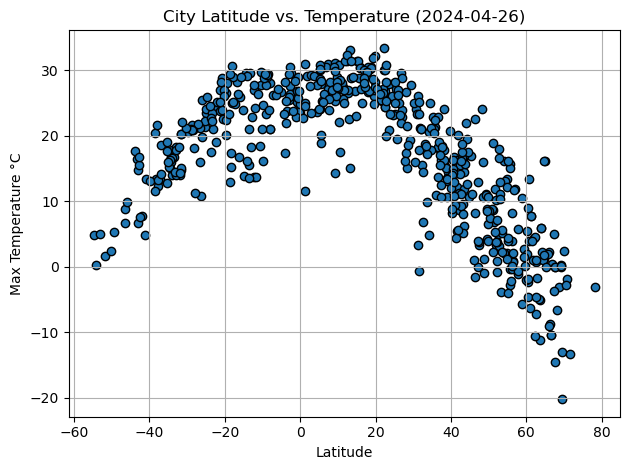

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

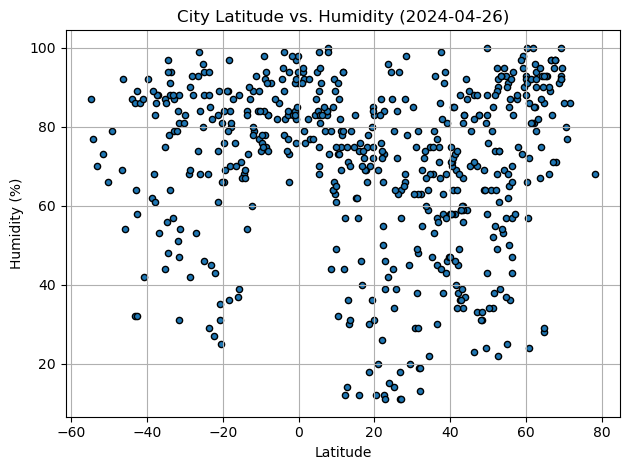

In [11]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

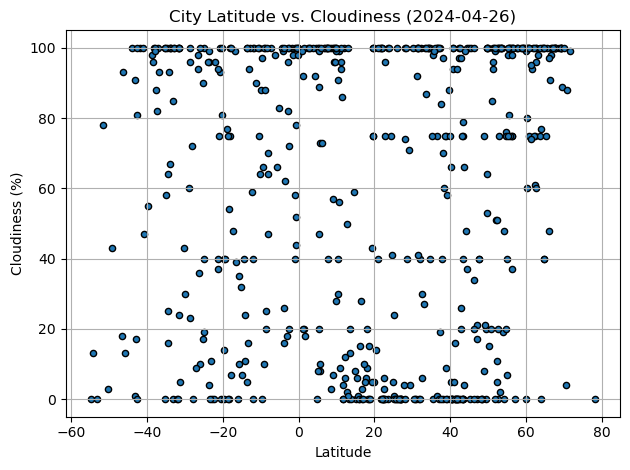

In [12]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

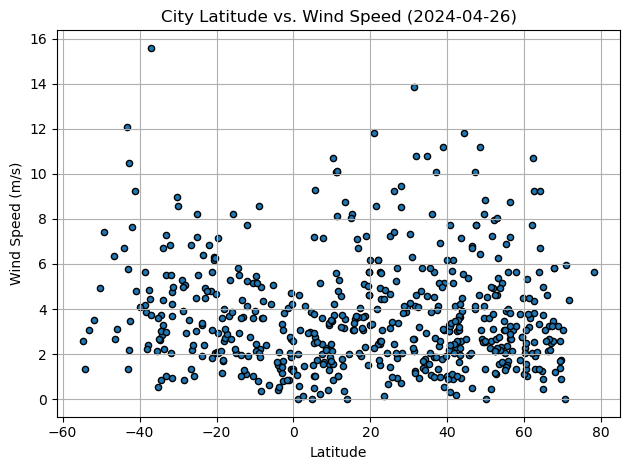

In [13]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def lr_funcV2(x,y,name,vbl):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    # Calculate the position for the equation text
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_text = x_mean
    y_text = slope * x_mean + intercept
    plt.annotate( line_eq,(x_text,y_text), fontsize=14, color='red')
    plt.savefig(f"../output_data/LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')
    plt.show()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bikenibeu village,1.3673,173.1241,30.98,79,20,4.63,KI,2024-04-26
3,whitehorse,60.7161,-135.0538,13.43,24,75,1.03,CA,2024-04-26
4,idaho falls,43.4666,-112.0341,14.45,60,75,2.57,US,2024-04-26
5,pacific grove,36.6177,-121.9166,18.18,77,75,5.66,US,2024-04-26
8,pierre,44.3683,-100.3510,19.51,59,100,11.83,US,2024-04-26


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.33,77,13,1.36,GS,2024-04-26
2,adamstown,-25.0660,-130.1015,23.44,88,19,8.23,PN,2024-04-26
6,ushuaia,-54.8000,-68.3000,4.81,87,0,2.57,AR,2024-04-26
7,port-aux-francais,-49.3500,70.2167,5.28,79,43,7.44,TF,2024-04-26
9,puerto natales,-51.7236,-72.4875,1.62,73,78,3.51,CL,2024-04-26


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8685224355545963


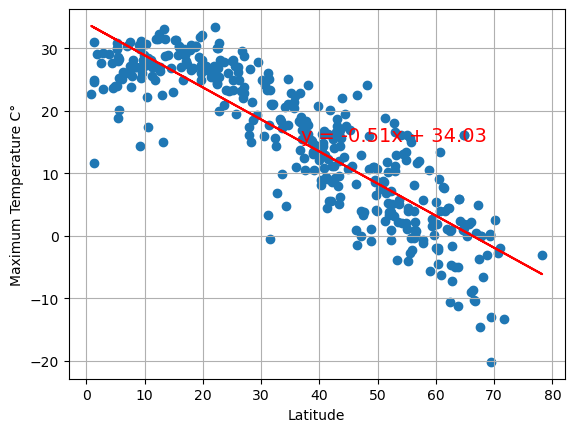

In [31]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
lr_funcV2(x,y,name,vbl)



The r-value is: 0.7597129624786298


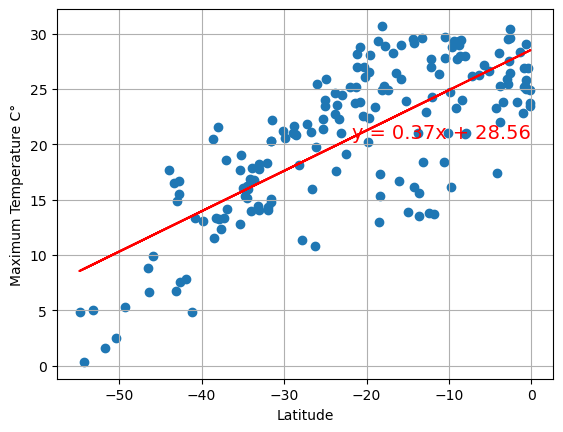

In [32]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o')
plt.grid()
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
lr_funcV2(x,y,name,vbl)


**Discussion about the linear relationship:** 

in northern heimsphere temprature  decreases as we go away from eqator while in southern heimsphere temprature increases as we approach equator

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.13006991252771938


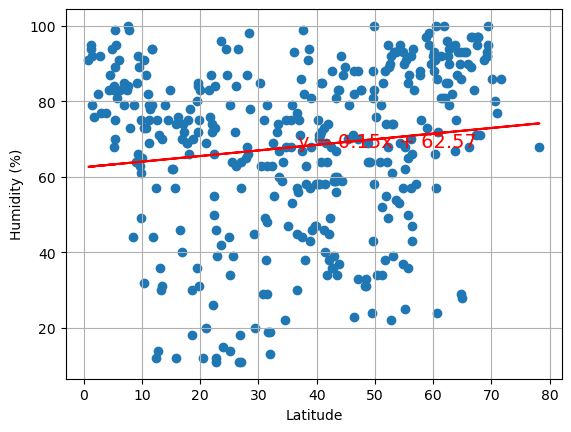

In [33]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o')
plt.grid()
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NH_LatVsHumidity'
vbl = 'Humidity (%)'
lr_funcV2(x,y,name,vbl)


The r-value is: 0.2352046645119099


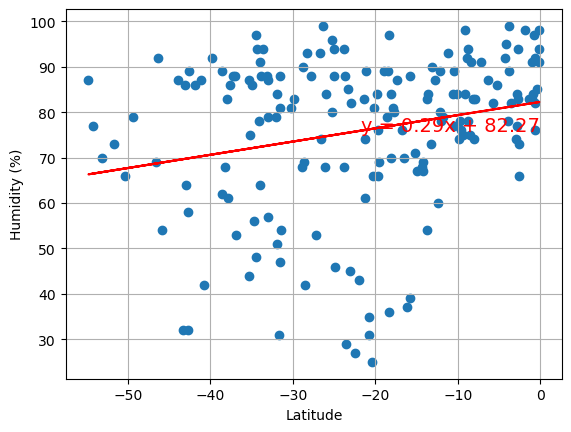

In [34]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o')
plt.grid()
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity (%)'
lr_funcV2(x,y,name,vbl)


**Discussion about the linear relationship:** 

Humudity is positively correlated with latitude. although the relation ship is not strong but humidity shows slight increase as we move from south to north heimisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.21303485838987074


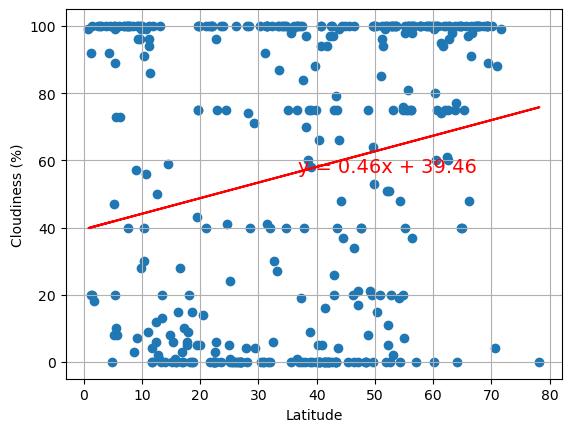

In [35]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o')
plt.grid()
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
lr_funcV2(x,y,name,vbl)


The r-value is: 0.12070664210368685


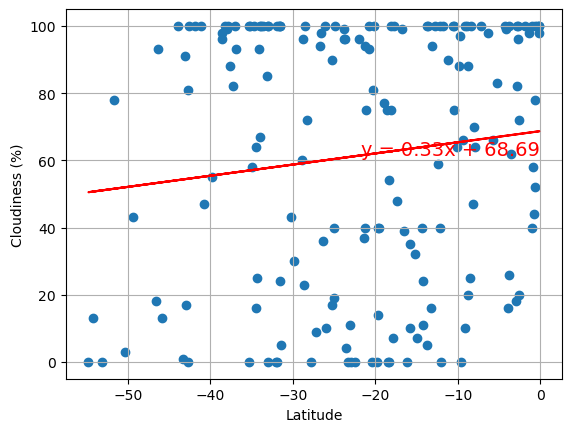

In [36]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o')
plt.grid()
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
lr_funcV2(x,y,name,vbl)


**Discussion about the linear relationship:** 
cloudiness and latitude do not have strong correlation. as we see on the scatter plot the data plots are widely dispersed


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.020342129084799702


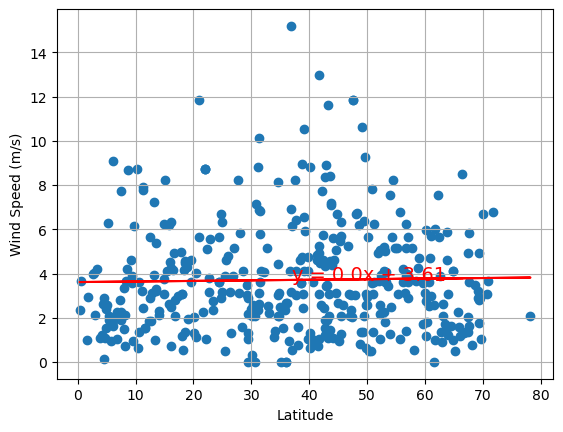

In [22]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o')
plt.grid()
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
lr_funcV2(x,y,name,vbl)


The r-value is: -0.23959233538082927


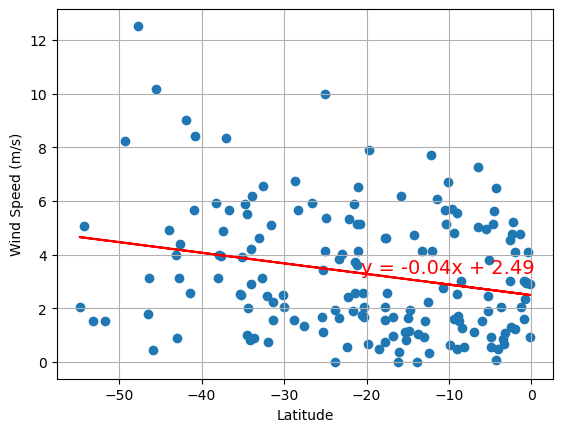

In [23]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o')
plt.grid()
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
lr_funcV2(x,y,name,vbl)


**Discussion about the linear relationship:** 
wind speed is barely correlated with latitude
